In [1]:
!ls

GalaxyZooDataExploration.ipynb galaxy_zoo_images


In [2]:
import PIL
import PIL.Image
import pathlib

In [28]:
# This defines a pathlib path object
image_dir = pathlib.Path('galaxy_zoo_images')

In [33]:
images = image_dir.glob('*.jpg')
image_list = list(images)

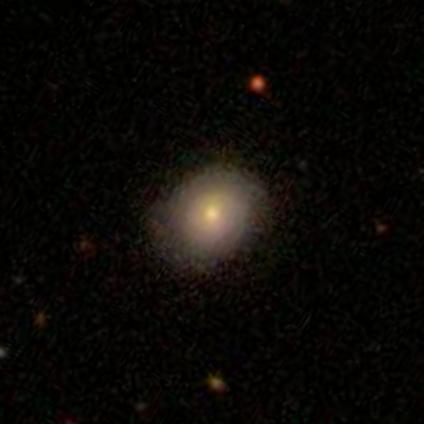

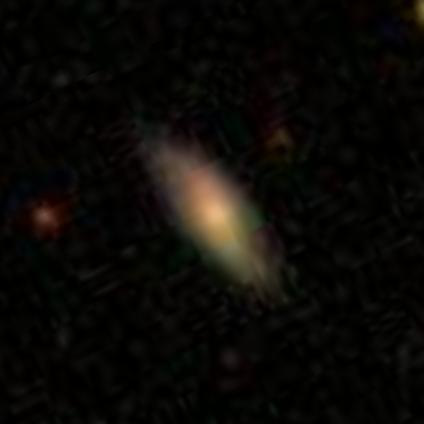

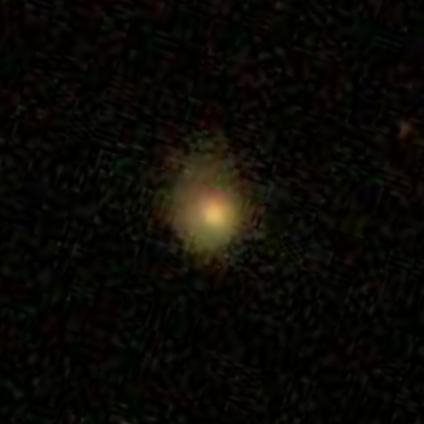

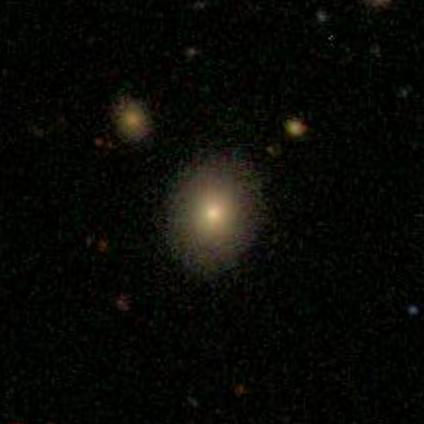

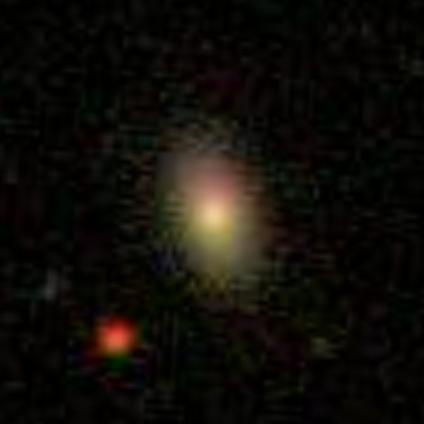

In [39]:
n_plot = 5
for i in range(n_plot):
    display(PIL.Image.open(str(image_list[i])))

There is a great dataset on handling images in tensorflow [here](https://www.tensorflow.org/tutorials/load_data/images). 

We aren't going to tell you much more about these images, except to say that they are rotationally symmetric, and have different levels of bluriness.